# Using COCO API to check subset

- https://github.com/cocodataset/cocoapi


In [1]:
from pycocotools.coco import COCO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pycocotools.mask as mask_util
from random import randint
from collections import defaultdict

In [2]:
coco_folder = '/home/ubuntu/dormakaba/coco'
dp_coco = COCO( coco_folder + '/annotations/custom_small_ann_train2014_v1.json')


loading annotations into memory...
Done (t=296.28s)
creating index...
index created!


In [3]:
# Get img id's for the dataset.
im_ids = dp_coco.getImgIds()
# Select a random image id.
Selected_im = im_ids[randint(0, len(im_ids))] # Choose im no 57 to replicate 
# print(Selected_im)
# Selected_im = 262145
# Load the image
im = dp_coco.loadImgs(Selected_im)[0]  
# Load Anns for the selected image.
ann_ids = dp_coco.getAnnIds( imgIds=im['id'] )
anns = dp_coco.loadAnns(ann_ids)
# Now read and b
im_name = os.path.join( coco_folder + '/images/train2014', im['file_name'] )

In [4]:
img_to_anns = list(dp_coco.imgToAnns.keys())
all_img_ids = list(dp_coco.imgs.keys())
all_ann_ids = dp_coco.getAnnIds()
print(len(img_to_anns), len(all_img_ids), len(all_ann_ids))

50127 50127 590470


In [5]:
ann_not_in_list = []
count = 0
for img_id in all_img_ids:
    try:
        filename = dp_coco.loadImgs(img_id)
    except:
        ann_not_in_list.append(img_id)


In [6]:
print( len(ann_not_in_list))

0


572958 {'license': 5, 'file_name': 'COCO_train2014_000000572958.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000572958.jpg', 'height': 500, 'width': 333, 'date_captured': '2013-11-19 23:25:39', 'flickr_url': 'http://farm3.staticflickr.com/2421/3977525813_4b588837a0_z.jpg', 'id': 572958} [111846, 111847, 111848, 111849, 111850, 111851, 111852, 111853, 111854, 111855, 111856, 111857, 111858, 111859, 111860, 111861, 111862, 111863, 111864, 111865, 111866, 111867, 111868, 111869, 111870, 111871, 111872, 581793] /home/ubuntu/dormakaba/coco/images/train2014/COCO_train2014_000000572958.jpg


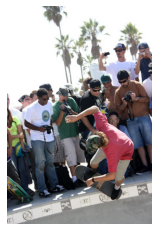

In [8]:
print( Selected_im, im, ann_ids, im_name)
I=cv2.imread(im_name)
if I is not None:
    plt.imshow(I[:,:,::-1]); plt.axis('off'); plt.show()
else:
    print("No image to load")

In [9]:
ids = dp_coco.getAnnIds(imgIds=[Selected_im])
print(ids)
target = dp_coco.loadAnns(ids)
print(len(target))
file_name = dp_coco.loadImgs(Selected_im)[0]['file_name']
print(file_name)
mask = dp_coco.annToMask(target[0])
print(mask.shape, mask.max())


[111846, 111847, 111848, 111849, 111850, 111851, 111852, 111853, 111854, 111855, 111856, 111857, 111858, 111859, 111860, 111861, 111862, 111863, 111864, 111865, 111866, 111867, 111868, 111869, 111870, 111871, 111872, 581793]
28
COCO_train2014_000000572958.jpg
(500, 333) 1


In [10]:
def GetDensePoseMask(Polys):
    MaskGen = np.zeros([256,256])
    for i in range(1,15):
        if(Polys[i-1]):
            current_mask = mask_util.decode(Polys[i-1])
            MaskGen[current_mask>0] = i
    return MaskGen

In [11]:
points0 = anns[0]['segmentation'][0]

In [12]:
print(anns[0].keys())

dict_keys(['segmentation', 'area', 'image_id', 'id', 'category_id', 'bbox', 'iscrowd'])


{'segmentation': [[2.38, 228.49, 12.77, 251.02, 28.95, 256.79, 35.88, 292.6, 39.34, 314.55, 45.12, 327.84, 51.47, 344.01, 53.78, 379.24, 49.74, 416.21, 48.58, 434.11, 35.3, 418.52, 32.99, 402.35, 24.9, 379.82, 8.15, 345.74, 11.04, 318.6, 5.27, 285.67, 0, 278.17, 1.22, 251.6]], 'area': 5239.23165, 'image_id': 572958, 'id': 111846, 'category_id': 1, 'bbox': [0, 228, 53, 205], 'iscrowd': 0}
{'segmentation': [[104.49, 433.71, 86.52, 439.33, 74.16, 434.83, 64.04, 410.11, 62.92, 360.67, 56.18, 321.35, 51.69, 298.88, 26.97, 253.93, 29.21, 246.07, 65.17, 222.47, 59.55, 192.13, 92.13, 187.64, 96.63, 197.75, 97.75, 213.48, 104.49, 222.47, 104.49, 239.33, 103.37, 273.03, 110.11, 305.62, 108.99, 334.83, 110.11, 380.9, 116.85, 395.51, 134.83, 414.61, 134.83, 419.1, 121.35, 424.72, 106.74, 425.84, 104.49, 430.34]], 'area': 13163.94135, 'image_id': 572958, 'id': 111847, 'category_id': 1, 'bbox': [26, 187, 107, 251], 'iscrowd': 0}
{'segmentation': [[108.77, 222.58, 119.56, 217.68, 122.01, 212.29, 117.

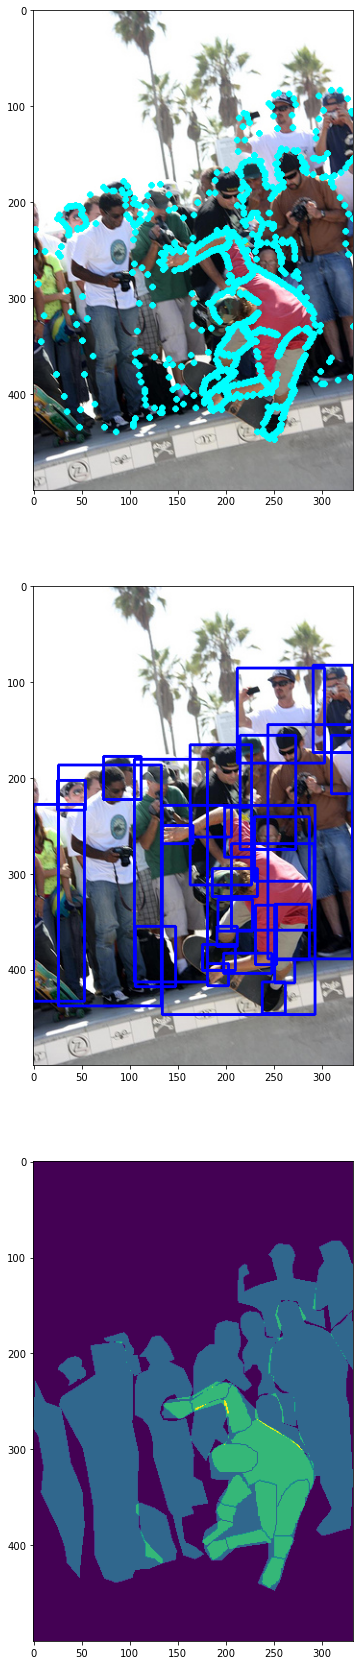

In [13]:
I2 = I.copy()
I3 = I.copy()
I4 = np.zeros((I.shape[0], I.shape[1]))

fog = plt.figure(figsize=[30,30])
i = 0
for ann in anns:
    for i in range(0,len(ann['segmentation'][0]),2):
        x = int(ann['segmentation'][0][i])
        y = int(ann['segmentation'][0][i+1])
        I2 = cv2.circle(I2, (x,y), 2,(255,255,0),2)
    bbr =  np.array(ann['bbox']).astype(int) # the box.
    # print(ann['category_id'], bbr)
    # x1,y1,x2,y2 = bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
    x1,y1,x2,y2 = bbr[0],bbr[1],bbr[0]+bbr[2],bbr[1]+bbr[3]
    I3 = cv2.rectangle(I3, (x1,y1), (x2,y2),(255,0,0),2)
    print(ann)
    if len(ann['segmentation'][0]) > 4:
        Mask = dp_coco.annToMask(ann)
        I4 += Mask

plt.subplot(3,1,1)
plt.imshow(I2[:,:,::-1])

plt.subplot(3,1,2)
plt.imshow(I3[:,:,::-1])

plt.subplot(3,1,3)
plt.imshow(I4)

In [14]:
SMALL_CUSTOM_LABEL_MAP = {2:1, 17:2, 18:3, 27:4, 31:5, 33:6, 91:7, 92:8, 93:9}

In [16]:
dp_coco.getCatIds()

[2, 17, 18, 27, 31, 33, 91, 92, 93]

In [22]:
cimgs = dp_coco.getImgIds(dp_coco.getCatIds)